In [ ]:
!pip3 install imblearn
!pip3 install xgboost

Only need to run the above if you don't have those libraries

In [2]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from sklearn.ensemble import AdaBoostClassifier

import pickle

from sklearn.metrics import confusion_matrix, accuracy_score
import seaborn as sb
import matplotlib.pyplot as plt
sb.set()

In [3]:
df = pd.read_csv('df_clean.csv')
df

,AppName,Category,Price,Size,ContentRating,AdSupported,InAppPurchases,EditorsChoice,AppAge,DaysSinceLastUpdate,GoodApp
0,Dodge The Cars!,Racing,0.0,52224.0,Everyone,False,False,False,320,320,False
1,Block Fill: Puzzle Game,Puzzle,0.0,16384.0,Everyone,True,True,False,459,400,False
2,Sticky Ball,Arcade,0.0,25600.0,Everyone,True,True,False,1198,1177,False
3,Extrude Balance,Arcade,0.0,26624.0,Everyone,True,True,False,708,45,False
4,Bowling Paradise Pro FREE,Sports,0.0,38912.0,Everyone,True,True,False,2971,2278,False
...,...,...,...,...,...,...,...,...,...,...,...
214476,Contactix,Strategy,0.0,1638.4,Everyone,False,False,False,2763,1475,False
214477,La Molina,Sports,0.0,45056.0,Everyone,False,False,False,1415,85,False
214478,Shield Runner,Arcade,0.0,22528.0,Everyone,True,False,False,1903,1895,False
214479,Hopeless 2: Cave Escape,Action,0.0,37888.0,Teen,True,True,False,2057,1563,True


In [4]:
df.drop(['AppName'], axis = 1, inplace = True)

In [5]:
df.dtypes

Category                object
Price                  float64
Size                   float64
ContentRating           object
AdSupported               bool
InAppPurchases            bool
EditorsChoice             bool
AppAge                   int64
DaysSinceLastUpdate      int64
GoodApp                   bool
dtype: object

# Encode categorical variables to dummy variables

In [6]:
df = pd.get_dummies(df)
pd.set_option('display.max_columns', None)
df

,Price,Size,AdSupported,InAppPurchases,EditorsChoice,AppAge,DaysSinceLastUpdate,GoodApp,Category_Action,Category_Adventure,Category_Arcade,Category_Board,Category_Card,Category_Casino,Category_Casual,Category_Educational,Category_Music,Category_Puzzle,Category_Racing,Category_Role Playing,Category_Simulation,Category_Sports,Category_Strategy,Category_Trivia,Category_Word,ContentRating_Adults only 18+,ContentRating_Everyone,ContentRating_Everyone 10+,ContentRating_Mature 17+,ContentRating_Teen
0,0.0,52224.0,False,False,False,320,320,False,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0
1,0.0,16384.0,True,True,False,459,400,False,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0
2,0.0,25600.0,True,True,False,1198,1177,False,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
3,0.0,26624.0,True,True,False,708,45,False,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
4,0.0,38912.0,True,True,False,2971,2278,False,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
214476,0.0,1638.4,False,False,False,2763,1475,False,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0
214477,0.0,45056.0,False,False,False,1415,85,False,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0
214478,0.0,22528.0,True,False,False,1903,1895,False,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
214479,0.0,37888.0,True,True,False,2057,1563,True,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


# Create predictor and response dataframe

In [7]:
x = df.drop(['GoodApp'], axis = 1)
y = df[['GoodApp']]

# Do a 70:30 train-test split, with seed set as 0

In [8]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 0)

In [9]:
print('Number of data in train set:', x_train.shape[0])
print('Number of data in test set:', x_test.shape[0])

Number of data in train set: 150136
Number of data in test set: 64345


# Correct Class Imbalance in the Train Set

In [10]:
y_train.value_counts()

GoodApp
False      138965
True        11171
dtype: int64

Very imbalanced classes, with about 13:1 ratio. This is not suprising as the number of good apps is expected to be less than the number of not good apps. We will correct the class imbalance using the SMOTE method.

In [11]:
oversample = SMOTE()
x_train, y_train = oversample.fit_resample(x_train, y_train)

In [12]:
print('Number of data in train set:', x_train.shape[0])

Number of data in train set: 277930


In [13]:
y_train.value_counts()

GoodApp
True       138965
False      138965
dtype: int64

We can see that the number of data in the trainset has increased from 150,136 to 277,930 with SMOTE. The class imbalance issue in the trainset is also fixed as the ratio of true is to false is now 1:1.

# Function for Prediction and Producing the Confusion Matrix + its Metrics

In [14]:
def prediction_metrics(x, model, y_test):
    y_pred = model.predict(x)
    cm = confusion_matrix(y_test, y_pred)
    s = sb.heatmap(cm, annot = True, fmt=".0f", annot_kws={"size": 18})
    s.set(xlabel='Predicted', ylabel='Actual')
    
    tp = cm[1][1]
    fp = cm[0][1]
    tn = cm[0][0]
    fn = cm[1][0]
    
    acc = ((tp+tn)/(tp+fp+tn+fn))*100
    tpr = (tp/(tp + fn))*100
    tnr = (tn/(tn + fp))*100
    fpr = (fp/(tn + fp))*100
    fnr = (fn/(tp + fn))*100

    print("Overall Accuracy Rate: %.2f" %acc)
    print("TPR: %.2f" %tpr)
    print("TNR: %.2f" %tnr)
    print("FPR: %.2f" %fpr)
    print("FNR: %.2f" %fnr)

Confusion Matrix Interpretation:  

| Confusion Matrix  |       |        |        |      
| :---              | :---: | :----: | :----: |         
| Actual Negative   |  (0)  |   TN   |   FP   |             
| Actual Positive   |  (1)  |   FN   |   TP   |       
|                   |       |   (0)   |   (1)   |       
|                   |       | Predicted Negative    |   Predicted Postitive  |     


* `TPR = TP / (TP + FN)` : True Positive Rate = True Positives / All Positives    
* `TNR = TN / (TN + FP)` : True Negative Rate = True Negatives / All Negatives    

* `FPR = FP / (TN + FP)` : False Positive Rate = False Positives / All Negatives 
* `FNR = FN / (TP + FN)` : False Negative Rate = False Negatives / All Positives

# Logistic Regression

In [15]:
lr_model = LogisticRegression(random_state = 0, max_iter = 500).fit(x_train, y_train.values.ravel())

Trainset Metrics

Overall Accuracy Rate: 69.69
TPR: 83.16
TNR: 56.22
FPR: 43.78
FNR: 16.84


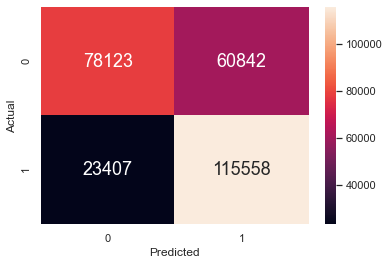

In [16]:
print('Trainset Metrics\n')
prediction_metrics(x_train, lr_model, y_train)
plt.savefig('lr-train.png', transparent = True)

Testset Metrics

Overall Accuracy Rate: 58.04
TPR: 82.92
TNR: 56.07
FPR: 43.93
FNR: 17.08


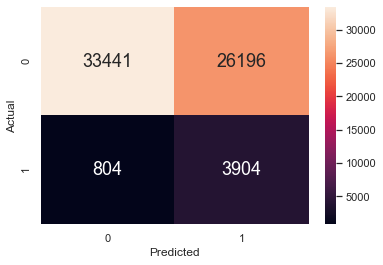

In [17]:
print('Testset Metrics\n')
prediction_metrics(x_test, lr_model, y_test)
plt.savefig('lr-test.png', transparent = True)

*Note*: No feature importance for logistic regression as all variables need to have the same scale prior to fitting the model, in order to derive feature importance (by looking at the coefficient of each predictor variable). When we attempted to normalise the data (using code from [this link](https://www.stackvidhya.com/how-to-normalize-data-between-0-and-1-range/#:~:text=You%20can%20normalize%20data%20between,min(data))), the false negative rate increased significantly. 

Furthermore, we would have to use the normalised data on the other models, so we decided to retain the numeric data as they are, and not scale them.

# Random Forest

In [18]:
rf_model = RandomForestClassifier(n_estimators = 500).fit(x_train, y_train.values.ravel())

Trainset Metrics

Overall Accuracy Rate: 100.00
TPR: 100.00
TNR: 100.00
FPR: 0.00
FNR: 0.00


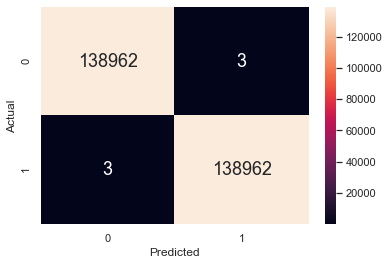

In [19]:
print('Trainset Metrics\n')
prediction_metrics(x_train, rf_model, y_train)
plt.savefig('rf-train.png', transparent = True)

Testset Metrics

Overall Accuracy Rate: 92.77
TPR: 30.80
TNR: 97.67
FPR: 2.33
FNR: 69.20


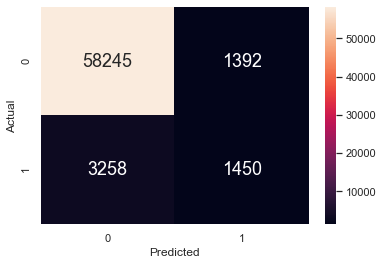

In [20]:
print('Testset Metrics\n')
prediction_metrics(x_test, rf_model, y_test)
plt.savefig('rf-test.png', transparent = True)

### Random Forest: Feature Importance (code from [here](https://machinelearningmastery.com/calculate-feature-importance-with-python/))

Feature: 0, Score: 0.00192
Feature: 1, Score: 0.09032
Feature: 2, Score: 0.05464
Feature: 3, Score: 0.21681
Feature: 4, Score: 0.00350
Feature: 5, Score: 0.12682
Feature: 6, Score: 0.11241
Feature: 7, Score: 0.02063
Feature: 8, Score: 0.01839
Feature: 9, Score: 0.03356
Feature: 10, Score: 0.01035
Feature: 11, Score: 0.01072
Feature: 12, Score: 0.00621
Feature: 13, Score: 0.02452
Feature: 14, Score: 0.01200
Feature: 15, Score: 0.00393
Feature: 16, Score: 0.03189
Feature: 17, Score: 0.01071
Feature: 18, Score: 0.01114
Feature: 19, Score: 0.01978
Feature: 20, Score: 0.02616
Feature: 21, Score: 0.00946
Feature: 22, Score: 0.01202
Feature: 23, Score: 0.01162
Feature: 24, Score: 0.00004
Feature: 25, Score: 0.05648
Feature: 26, Score: 0.01785
Feature: 27, Score: 0.01006
Feature: 28, Score: 0.03605


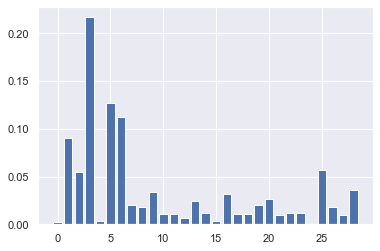

In [21]:
rfimportance = rf_model.feature_importances_

# summarise feature importance
for i,v in enumerate(rfimportance):
    print('Feature: %0d, Score: %.5f' % (i,v))

# plot feature importance
plt.bar([x for x in range(len(rfimportance))], rfimportance)
plt.show()

In [22]:
top4indices = np.argpartition(rfimportance, -4)[-4:]
x_train.iloc[:,top4indices].columns

Index(['Size', 'DaysSinceLastUpdate', 'AppAge', 'InAppPurchases'], dtype='object')

The feature importance is as follows, in order of descending importance: 
1. InAppPurchases
2. AppAge
3. DaysSinceLastUpdate
4. Size

# Random Forest with XGBoost

In [23]:
xgbrf_model = xgb.XGBRFClassifier(n_estimators = 500, subsample = 0.9, colsample_bynode = 0.2).fit(x_train, y_train)

Trainset Metrics

Overall Accuracy Rate: 85.96
TPR: 87.57
TNR: 84.35
FPR: 15.65
FNR: 12.43


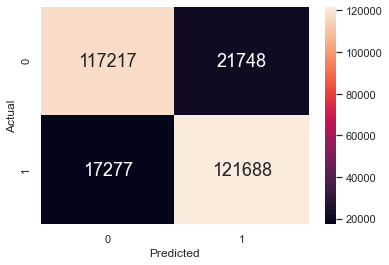

In [24]:
print('Trainset Metrics\n')
prediction_metrics(x_train, xgbrf_model, y_train)
plt.savefig('xgbrf-train.png', transparent = True)

Testset Metrics

Overall Accuracy Rate: 82.75
TPR: 59.18
TNR: 84.61
FPR: 15.39
FNR: 40.82


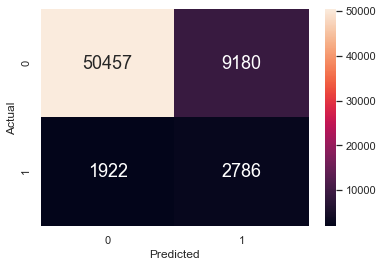

In [25]:
print('Testset Metrics\n')
prediction_metrics(x_test, xgbrf_model, y_test)
plt.savefig('xgbrf-test.png', transparent = True)

### Random Forest with XGBoost: Feature Importance (code from [here](https://machinelearningmastery.com/calculate-feature-importance-with-python/))

Feature: 0, Score: 0.00064
Feature: 1, Score: 0.02925
Feature: 2, Score: 0.07686
Feature: 3, Score: 0.27454
Feature: 4, Score: 0.00535
Feature: 5, Score: 0.02274
Feature: 6, Score: 0.03721
Feature: 7, Score: 0.02992
Feature: 8, Score: 0.02870
Feature: 9, Score: 0.06804
Feature: 10, Score: 0.00734
Feature: 11, Score: 0.00811
Feature: 12, Score: 0.01554
Feature: 13, Score: 0.03568
Feature: 14, Score: 0.01286
Feature: 15, Score: 0.00124
Feature: 16, Score: 0.05488
Feature: 17, Score: 0.01130
Feature: 18, Score: 0.00993
Feature: 19, Score: 0.02681
Feature: 20, Score: 0.05011
Feature: 21, Score: 0.00581
Feature: 22, Score: 0.01730
Feature: 23, Score: 0.01161
Feature: 24, Score: 0.00003
Feature: 25, Score: 0.08495
Feature: 26, Score: 0.01859
Feature: 27, Score: 0.01275
Feature: 28, Score: 0.04192


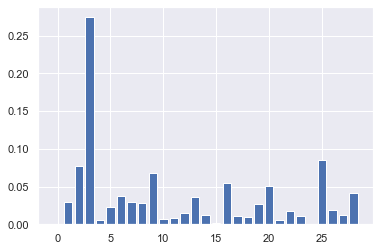

In [26]:
rximportance = xgbrf_model.feature_importances_

# summarise feature importance
for i,v in enumerate(rximportance):
    print('Feature: %0d, Score: %.5f' % (i,v))

# plot feature importance
plt.bar([x for x in range(len(rximportance))], rximportance)
plt.savefig('importance.png', transparent = True)
plt.show()

InAppPurchases is by far the most important feature here

In [27]:
top5indices = np.argpartition(rximportance, -5)[-5:]
x_train.iloc[:,top5indices].columns

Index(['Category_Puzzle', 'InAppPurchases', 'Category_Arcade', 'AdSupported',
       'ContentRating_Everyone'],
      dtype='object')

# AdaBoost

In [28]:
ab_model = AdaBoostClassifier().fit(x_train, y_train.values.ravel())

Trainset Metrics

Overall Accuracy Rate: 92.61
TPR: 92.16
TNR: 93.06
FPR: 6.94
FNR: 7.84


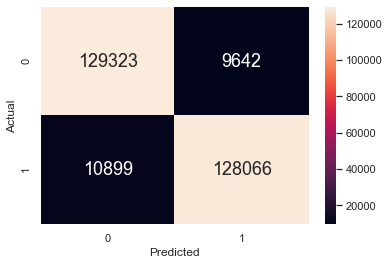

In [29]:
print('Trainset Metrics\n')
prediction_metrics(x_train, ab_model, y_train)
plt.savefig('ab-train.png', transparent = True)

Testset Metrics

Overall Accuracy Rate: 89.67
TPR: 46.73
TNR: 93.06
FPR: 6.94
FNR: 53.27


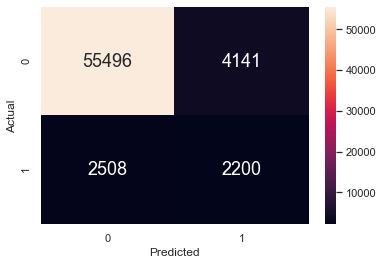

In [30]:
print('Testset Metrics\n')
prediction_metrics(x_test, ab_model, y_test)
plt.savefig('ab-test.png', transparent = True)

### AdaBoost: Feature Importance (code from [here](https://machinelearningmastery.com/calculate-feature-importance-with-python/))

Feature: 0, Score: 0.00000
Feature: 1, Score: 0.02000
Feature: 2, Score: 0.02000
Feature: 3, Score: 0.04000
Feature: 4, Score: 0.02000
Feature: 5, Score: 0.08000
Feature: 6, Score: 0.06000
Feature: 7, Score: 0.04000
Feature: 8, Score: 0.04000
Feature: 9, Score: 0.04000
Feature: 10, Score: 0.02000
Feature: 11, Score: 0.04000
Feature: 12, Score: 0.02000
Feature: 13, Score: 0.06000
Feature: 14, Score: 0.04000
Feature: 15, Score: 0.02000
Feature: 16, Score: 0.06000
Feature: 17, Score: 0.04000
Feature: 18, Score: 0.04000
Feature: 19, Score: 0.04000
Feature: 20, Score: 0.04000
Feature: 21, Score: 0.02000
Feature: 22, Score: 0.02000
Feature: 23, Score: 0.02000
Feature: 24, Score: 0.00000
Feature: 25, Score: 0.06000
Feature: 26, Score: 0.04000
Feature: 27, Score: 0.02000
Feature: 28, Score: 0.04000


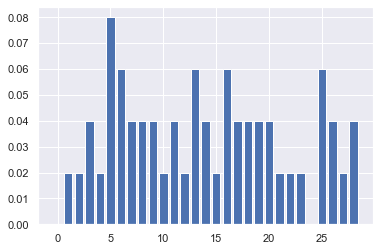

In [31]:
abimportance = ab_model.feature_importances_

# summarise feature importance
for i,v in enumerate(abimportance):
    print('Feature: %0d, Score: %.5f' % (i,v))

# plot feature importance
plt.bar([x for x in range(len(abimportance))], abimportance)
plt.show()

In [32]:
top6indices = np.argpartition(abimportance, -6)[-6:]
x_train.iloc[:,top6indices].columns

Index(['Category_Arcade', 'ContentRating_Everyone', 'Category_Casual',
       'AppAge', 'DaysSinceLastUpdate', 'Category_Puzzle'],
      dtype='object')

The feature importance for AdaBoost is as follows, in order of descending importance: 
1. DaysSinceLastUpdate
2. Category_Casual = Category_Arcarde = Category_Puzzle = AppAge = Content_Rating_Everyone

# Save/Load the ML models here

In [33]:
# save
pickle.dump(lr_model, open('lr_model.sav', 'wb'))
pickle.dump(rf_model, open('rf_model.sav', 'wb'))
pickle.dump(xgbrf_model, open('xgbrf_model.sav', 'wb'))
pickle.dump(ab_model, open('ab_model.sav', 'wb'))

In [ ]:
# load
lr_model = pickle.load(open('lr_model.sav', 'rb'))
rf_model = pickle.load(open('rf_model.sav', 'rb'))
xgbrf_model = pickle.load(open('xgbrf_model.sav', 'rb'))
ab_model = pickle.load(open('ab_model.sav', 'rb'))